In [6]:
# Use nbodykit-env

def read_quijote(filepath, cosm, snapnum, axis, space):
    """
    Returns array with Halo positions in Mpc/h
    """
    #import numpy as np
    import readgadget
    import readfof
    import redshift_space_library as RSL

    #-----------
    # Read data from Quijote
    #-----------

    # get the name of the corresponding snapshot
    snapshot = '/home/federico/mnts/clemente/Proyectos/VPF_Quijote/data/quijote/Snapshots/%s/0/snapdir_%03d/snap_%03d'%(cosm,snapnum,snapnum)
    
    # read the redshift, boxsize, cosmology...etc in the header
    header   = readgadget.header(snapshot)
    BoxSize  = header.boxsize/1e3  #Mpc/h
    #Nall     = header.nall         #Total number of particles
    #Masses   = header.massarr*1e10 #Masses of the particles in Msun/h
    Omega_m  = header.omega_m      #value of Omega_m
    Omega_l  = header.omega_l      #value of Omega_l
    h        = header.hubble       #value of h
    redshift = header.redshift     #redshift of the snapshot
    Hubble   = 100.0*np.sqrt(Omega_m*(1.0+redshift)**3+Omega_l) #Value of H(z) in km/s/(Mpc/h)

    print(f'BoxSize = {BoxSize} Mpc/h')
    print(f'Omega_m = {Omega_m}')
    print(f'h = {h}')
    print(f'redshift = {redshift:.1f}')


    FoF = readfof.FoF_catalog(filepath, snapnum, long_ids=False,
                            swap=False, SFR=False, read_IDs=False)
    pos_h  = FoF.GroupPos/1e3            #Halo positions in Mpc/h
    vel_h  = FoF.GroupVel*(1.0+redshift) #Halo peculiar velocities in km/s

    if space == 'zspace':
    	RSL.pos_redshift_space(pos_h, vel_h, BoxSize, Hubble, redshift, axis)

    return pos_h, vel_h, BoxSize  #Halo positions in Mpc/h

import numpy as np
import numpy as np
from nbodykit.lab import *

cosm = 'fiducial'
snapnum = 4
axis = 0
space = 'zspace'
dir = '/home/federico/mnts/clemente/Proyectos/VPF_Quijote/data/quijote/Halos/FoF/fiducial/sim1/1/'

pos, vel, bs = read_quijote(dir,cosm,snapnum,axis,space)


BoxSize = 1000.0 Mpc/h
Omega_m = 0.3175
h = 0.6711
redshift = 0.0


In [7]:
data = np.empty(len(pos), dtype=[('Position', ('f8', 3))])
data['Position'] = pos
f = ArrayCatalog(data,names=['x','y','z'])

nbins_m = 30
nbins_s = 29

corr = SimulationBox2PCF('2d',f,np.linspace(10.,150.,nbins_s+1),nbins_m,BoxSize=[bs,bs,bs], periodic=True)

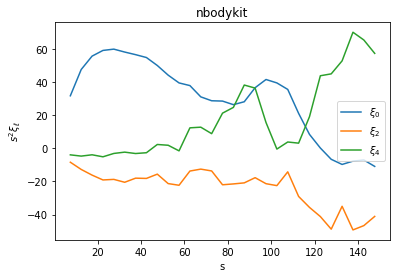

In [8]:
def get_xi0246(corr,nbins_m,nbins_s):
    
    import numpy as np
	
    xi_sm = corr.corr.data['corr']
    
    ##Modificado para que lea los valores de entrada
    ##nbins_m=30 # number of bins in mu
    ##nbins_s=29 # number of bins in s
    dmu=1.0/nbins_m
    
    rs = corr.D1D2.coords['r']
    mu = corr.D1D2.coords['mu']
    
    xi_s0 = np.zeros(nbins_s)
    xi_s2 = np.zeros(nbins_s)
    xi_s4 = np.zeros(nbins_s)
    xi_s6 = np.zeros(nbins_s)
    
    sr = np.zeros(nbins_s)
    rm = np.zeros(nbins_m)
    
    l0 = 0.0
    l1 = 1.0
    l2 = 2.0
    l3 = 3.0
    
    for i in range(nbins_s):
    	
        sr[i] = rs[i]
		
        for j in range(nbins_m):
            rm[j]=mu[j]
            xi_s0[i]  += (4.0*l0+1.0)*xi_sm[i,j]*1.0*dmu 
            xi_s2[i]  += (4.0*l1+1.0)*xi_sm[i,j]*((3*rm[j]**2 - 1.0)/2.0)*dmu
            xi_s4[i]  += (4.0*l2+1.0)*xi_sm[i,j]*((35*rm[j]**4 - 30*rm[j]**2 + 3.0)/8.0)*dmu
            xi_s6[i]  += (4.0*l3+1.0)*xi_sm[i,j]*((231*rm[j]**6 - 315*rm[j]**4 + 105*rm[j]**2 - 5)/16.0)*dmu
    
    return xi_s0, xi_s2, xi_s4, xi_s6

import matplotlib.pyplot as plt

xi_l = get_xi0246(corr,nbins_m,nbins_s)

nr = 2.5+np.linspace(5.,150.,30)[:-1]
plt.plot(nr,(nr**2)*(xi_l[0]),label=r'$\xi_0$')
plt.plot(nr,(nr**2)*(-xi_l[1]),label=r'$\xi_2$')
plt.plot(nr,(nr**2)*(-xi_l[2]),label=r'$\xi_4$')
plt.title('nbodykit')
plt.xlabel('s')
plt.ylabel(r'$s^2\xi_{\ell}$')
plt.legend()
plt.show()

#### Quiero ver qué tan ruidosos son el cuadrupolo y el hexadecapolo

##### Voy a calcular los multipolos de varias simus

/home/federico/mnts/clemente/Proyectos/VPF_Quijote/data/quijote/Halos/FoF/fiducial/0
0
BoxSize = 1000.0 Mpc/h
Omega_m = 0.3175
h = 0.6711
redshift = 0.0
/home/federico/mnts/clemente/Proyectos/VPF_Quijote/data/quijote/Halos/FoF/fiducial/1
1
BoxSize = 1000.0 Mpc/h
Omega_m = 0.3175
h = 0.6711
redshift = 0.0
/home/federico/mnts/clemente/Proyectos/VPF_Quijote/data/quijote/Halos/FoF/fiducial/2
2
BoxSize = 1000.0 Mpc/h
Omega_m = 0.3175
h = 0.6711
redshift = 0.0
/home/federico/mnts/clemente/Proyectos/VPF_Quijote/data/quijote/Halos/FoF/fiducial/3
3
BoxSize = 1000.0 Mpc/h
Omega_m = 0.3175
h = 0.6711
redshift = 0.0
/home/federico/mnts/clemente/Proyectos/VPF_Quijote/data/quijote/Halos/FoF/fiducial/4
4
BoxSize = 1000.0 Mpc/h
Omega_m = 0.3175
h = 0.6711
redshift = 0.0


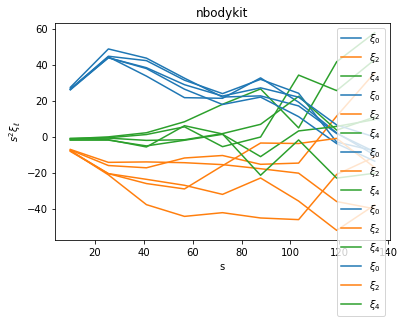

In [18]:
def read_quijote(filepath, cosm, snapnum, axis, space):
    """
    Returns array with Halo positions in Mpc/h
    """
    #import numpy as np
    import readgadget
    import readfof
    import redshift_space_library as RSL

    #-----------
    # Read data from Quijote
    #-----------

    # get the name of the corresponding snapshot
    snapshot = '/home/federico/mnts/clemente/Proyectos/VPF_Quijote/data/quijote/Snapshots/%s/0/snapdir_%03d/snap_%03d'%(cosm,snapnum,snapnum)
    
    # read the redshift, boxsize, cosmology...etc in the header
    header   = readgadget.header(snapshot)
    BoxSize  = header.boxsize/1e3  #Mpc/h
    #Nall     = header.nall         #Total number of particles
    #Masses   = header.massarr*1e10 #Masses of the particles in Msun/h
    Omega_m  = header.omega_m      #value of Omega_m
    Omega_l  = header.omega_l      #value of Omega_l
    h        = header.hubble       #value of h
    redshift = header.redshift     #redshift of the snapshot
    Hubble   = 100.0*np.sqrt(Omega_m*(1.0+redshift)**3+Omega_l) #Value of H(z) in km/s/(Mpc/h)

    print(f'BoxSize = {BoxSize} Mpc/h')
    print(f'Omega_m = {Omega_m}')
    print(f'h = {h}')
    print(f'redshift = {redshift:.1f}')


    FoF = readfof.FoF_catalog(filepath, snapnum, long_ids=False,
                            swap=False, SFR=False, read_IDs=False)
    pos_h  = FoF.GroupPos/1e3            #Halo positions in Mpc/h
    vel_h  = FoF.GroupVel*(1.0+redshift) #Halo peculiar velocities in km/s

    if space == 'zspace':
    	RSL.pos_redshift_space(pos_h, vel_h, BoxSize, Hubble, redshift, axis)

    return pos_h, vel_h, BoxSize  #Halo positions in Mpc/h

def get_xi0246(corr,nbins_m,nbins_s):
    
    import numpy as np
	
    xi_sm = corr.corr.data['corr']
    
    ##Modificado para que lea los valores de entrada
    ##nbins_m=30 # number of bins in mu
    ##nbins_s=29 # number of bins in s
    dmu=1.0/nbins_m
    
    rs = corr.D1D2.coords['r']
    mu = corr.D1D2.coords['mu']
    
    xi_s0 = np.zeros(nbins_s)
    xi_s2 = np.zeros(nbins_s)
    xi_s4 = np.zeros(nbins_s)
    xi_s6 = np.zeros(nbins_s)
    
    sr = np.zeros(nbins_s)
    rm = np.zeros(nbins_m)
    
    l0 = 0.0
    l1 = 1.0
    l2 = 2.0
    l3 = 3.0
    
    for i in range(nbins_s):
    	
        sr[i] = rs[i]
		
        for j in range(nbins_m):
            rm[j]=mu[j]
            xi_s0[i]  += (4.0*l0+1.0)*xi_sm[i,j]*1.0*dmu 
            xi_s2[i]  += (4.0*l1+1.0)*xi_sm[i,j]*((3*rm[j]**2 - 1.0)/2.0)*dmu
            xi_s4[i]  += (4.0*l2+1.0)*xi_sm[i,j]*((35*rm[j]**4 - 30*rm[j]**2 + 3.0)/8.0)*dmu
            xi_s6[i]  += (4.0*l3+1.0)*xi_sm[i,j]*((231*rm[j]**6 - 315*rm[j]**4 + 105*rm[j]**2 - 5)/16.0)*dmu
    
    return xi_s0, xi_s2, xi_s4, xi_s6

########################################
import numpy as np
import numpy as np
from nbodykit.lab import *
import matplotlib.pyplot as plt

cosm = 'fiducial'
snapnum = 4
axis = 0
space = 'zspace'
dir = '/home/federico/mnts/clemente/Proyectos/VPF_Quijote/data/quijote/Halos/FoF/fiducial/'

nbins_m = 10
nbins_s = 9
rmin = 10
rmax = 150
rbins = np.linspace(rmin,rmax,nbins_s+1)

for i in range(5):
    path = dir+str(i)
    print(path)
    print(i)
    pos, vel, bs = read_quijote(path,cosm,snapnum,axis,space)

    data = np.empty(len(pos), dtype=[('Position', ('f8', 3))])
    data['Position'] = pos
    f = ArrayCatalog(data,names=['x','y','z'])


    corr = SimulationBox2PCF('2d',f,rbins,nbins_m,BoxSize=[bs,bs,bs], periodic=True)

    xi_l = get_xi0246(corr,nbins_m,nbins_s)

    #nr = 2.5+np.linspace(5.,150.,nbins_s+1)[:-1]
    r = rbins[:-1]
    plt.plot(r,(r**2)*(xi_l[0]),label=r'$\xi_0$',c='C00')
    plt.plot(r,(r**2)*(-xi_l[1]),label=r'$\xi_2$',c='C01')
    plt.plot(r,(r**2)*(-xi_l[2]),label=r'$\xi_4$',c='C02')

plt.title('nbodykit')
plt.xlabel('s')
plt.ylabel(r'$s^2\xi_{\ell}$')
plt.legend()
plt.show()
